In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import random
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

In [3]:
ic50_data_path = "GDSC2_fitted_dose_response_27Oct23.xlsx"
raw_data_path = "GDSC2_public_raw_data_27Oct23.csv"

In [4]:
genetic_features_path = "PANCANCER_Genetic_features.csv"

In [102]:
genetic_data = pd.read_csv(genetic_features_path).sort_values("COSMIC ID")

/tmp/ipykernel_260398/654995865.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  genetic_data = pd.read_csv(genetic_features_path).sort_values("COSMIC ID")


In [103]:
genetic_data

,Cell Line Name,COSMIC ID,GDSC Desc1,GDSC Desc2,TCGA Desc,Genetic Feature,IS Mutated,Recurrent Gain Loss,Genes in Segment
627959,PFSK-1,683667,nervous_system,medulloblastoma,MB,GNA11_mut,0,NaN,NaN
627960,PFSK-1,683667,nervous_system,medulloblastoma,MB,GNAS_mut,0,NaN,NaN
627961,PFSK-1,683667,nervous_system,medulloblastoma,MB,GPS2_mut,0,NaN,NaN
627962,PFSK-1,683667,nervous_system,medulloblastoma,MB,HDAC9_mut,0,NaN,NaN
627963,PFSK-1,683667,nervous_system,medulloblastoma,MB,HGF_mut,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
71901,DiFi,1789883,digestive_system,large_intestine,COREAD,cnaPANCAN58,1,gain,"CARNS1,CLCF1,POLD4,PPP1CA,PTPRCAP,RAD9A,RPS6KB..."
71918,DiFi,1789883,digestive_system,large_intestine,COREAD,cnaPANCAN75,0,loss,"AMOTL1,ANKRD49,C11orf54,C11orf73,CCDC67,CCDC81..."
71919,DiFi,1789883,digestive_system,large_intestine,COREAD,cnaPANCAN76,0,loss,CNTN5
71888,DiFi,1789883,digestive_system,large_intestine,COREAD,cnaPANCAN45,0,loss,PDE6C


In [104]:
genetic_data["Cell Line Name"] = genetic_data["Cell Line Name"].astype("string")
genetic_data["GDSC Desc1"] = genetic_data["GDSC Desc1"].astype("string")
genetic_data["GDSC Desc2"] = genetic_data["GDSC Desc2"].astype("string")
genetic_data["TCGA Desc"] = genetic_data["TCGA Desc"].astype("string")
genetic_data["Genetic Feature"] = genetic_data["Genetic Feature"].astype("string")
genetic_data["Recurrent Gain Loss"] = genetic_data["Recurrent Gain Loss"].astype("string")
genetic_data["Genes in Segment"] = genetic_data["Genes in Segment"].astype("string")

In [105]:
genetic_data.dtypes

Cell Line Name         string
COSMIC ID               int64
GDSC Desc1             string
GDSC Desc2             string
TCGA Desc              string
Genetic Feature        string
IS Mutated              int64
Recurrent Gain Loss    string
Genes in Segment       string
dtype: object

In [106]:
genetic_features = list(set(genetic_data["Genetic Feature"].values.tolist()))

In [107]:
genetic_features

['cnaPANCAN396',
 'PSIP1_mut',
 'AKAP9_mut',
 'cnaPANCAN111',
 'CDC27_mut',
 'BNC2_mut',
 'ARID2_mut',
 'cnaPANCAN37',
 'cnaPANCAN395',
 'cnaPANCAN353',
 'SOS1_mut',
 'TJP2_mut',
 'ACVR2A_mut',
 'cnaPANCAN339',
 'cnaPANCAN420',
 'cnaPANCAN278',
 'RTN4_mut',
 'cnaPANCAN7',
 'cnaPANCAN343',
 'cnaPANCAN379',
 'ARID4A_mut',
 'cnaPANCAN331',
 'cnaPANCAN269',
 'KAT6B_mut',
 'cnaPANCAN289',
 'cnaPANCAN307',
 'cnaPANCAN374',
 'PML.RARA_mut',
 'MAP2K4_mut',
 'cnaPANCAN409',
 'cnaPANCAN92',
 'cnaPANCAN79',
 'cnaPANCAN413',
 'cnaPANCAN124',
 'cnaPANCAN282',
 'cnaPANCAN133',
 'PIK3R1_mut',
 'cnaPANCAN11',
 'cnaPANCAN154',
 'cnaPANCAN277',
 'cnaPANCAN292',
 'cnaPANCAN337',
 'cnaPANCAN183',
 'cnaPANCAN250',
 'cnaPANCAN237',
 'PCDH18_mut',
 'cnaPANCAN378',
 'cnaPANCAN158',
 'ATR_mut',
 'TAF1_mut',
 'cnaPANCAN304',
 'cnaPANCAN349',
 'SETDB1_mut',
 'cnaPANCAN192',
 'cnaPANCAN389',
 'cnaPANCAN102',
 'cnaPANCAN58',
 'RASA1_mut',
 'cnaPANCAN69',
 'cnaPANCAN137',
 'cnaPANCAN118',
 'cnaPANCAN386',
 'STK11_m

In [108]:
len(genetic_features)

735

In [109]:
mut_features = [feature for feature in genetic_features if feature[-4:] == "_mut"]
cna_features = [feature for feature in genetic_features if feature[:3] == "cna"]

In [110]:
mut_features.sort()
cna_features.sort()

In [111]:
mut_features

['ABCB1_mut',
 'ABL2_mut',
 'ACACA_mut',
 'ACVR1B_mut',
 'ACVR2A_mut',
 'ADCY1_mut',
 'AFF4_mut',
 'AHCTF1_mut',
 'AHNAK_mut',
 'AKAP9_mut',
 'AKT1_mut',
 'ALK_mut',
 'AMOT_mut',
 'ANK3_mut',
 'APAF1_mut',
 'APC_mut',
 'AQR_mut',
 'ARAP3_mut',
 'ARFGAP3_mut',
 'ARFGEF1_mut',
 'ARFGEF2_mut',
 'ARHGAP26_mut',
 'ARHGAP29_mut',
 'ARHGEF6_mut',
 'ARID1A_mut',
 'ARID1B_mut',
 'ARID2_mut',
 'ARID4A_mut',
 'ARID4B_mut',
 'ARID5B_mut',
 'ASH1L_mut',
 'ASPM_mut',
 'ASXL1_mut',
 'ASXL2_mut',
 'ATM_mut',
 'ATRX_mut',
 'ATR_mut',
 'AXIN1_mut',
 'AXIN2_mut',
 'B2M_mut',
 'BAP1_mut',
 'BAZ2B_mut',
 'BCLAF1_mut',
 'BCOR_mut',
 'BCR.ABL_mut',
 'BLM_mut',
 'BMPR2_mut',
 'BNC2_mut',
 'BPTF_mut',
 'BRAF_mut',
 'BRCA1_mut',
 'BRCA2_mut',
 'BRWD1_mut',
 'C15orf55_mut',
 'CAD_mut',
 'CASP8_mut',
 'CCAR1_mut',
 'CCND1_mut',
 'CDC27_mut',
 'CDC73_mut',
 'CDH1_mut',
 'CDK12_mut',
 'CDKN1A_mut',
 'CDKN1B_mut',
 'CDKN2A_mut',
 'CEP290_mut',
 'CHD3_mut',
 'CHD4_mut',
 'CHD6_mut',
 'CHD8_mut',
 'CHD9_mut',
 'CHEK2_

In [112]:
cna_features

['cnaPANCAN1',
 'cnaPANCAN10',
 'cnaPANCAN100',
 'cnaPANCAN101',
 'cnaPANCAN102',
 'cnaPANCAN103',
 'cnaPANCAN104',
 'cnaPANCAN105',
 'cnaPANCAN106',
 'cnaPANCAN107',
 'cnaPANCAN108',
 'cnaPANCAN109',
 'cnaPANCAN11',
 'cnaPANCAN110',
 'cnaPANCAN111',
 'cnaPANCAN112',
 'cnaPANCAN113',
 'cnaPANCAN114',
 'cnaPANCAN115',
 'cnaPANCAN116',
 'cnaPANCAN117',
 'cnaPANCAN118',
 'cnaPANCAN119',
 'cnaPANCAN12',
 'cnaPANCAN120',
 'cnaPANCAN121',
 'cnaPANCAN122',
 'cnaPANCAN123',
 'cnaPANCAN124',
 'cnaPANCAN125',
 'cnaPANCAN126',
 'cnaPANCAN127',
 'cnaPANCAN128',
 'cnaPANCAN129',
 'cnaPANCAN13',
 'cnaPANCAN130',
 'cnaPANCAN131',
 'cnaPANCAN132',
 'cnaPANCAN133',
 'cnaPANCAN134',
 'cnaPANCAN135',
 'cnaPANCAN136',
 'cnaPANCAN137',
 'cnaPANCAN138',
 'cnaPANCAN139',
 'cnaPANCAN14',
 'cnaPANCAN140',
 'cnaPANCAN141',
 'cnaPANCAN142',
 'cnaPANCAN143',
 'cnaPANCAN144',
 'cnaPANCAN145',
 'cnaPANCAN146',
 'cnaPANCAN147',
 'cnaPANCAN148',
 'cnaPANCAN149',
 'cnaPANCAN15',
 'cnaPANCAN150',
 'cnaPANCAN151',
 'cna

In [113]:
for feature in genetic_features:
    assert ((feature in mut_features) and not (feature in cna_features)) or (not (feature in mut_features) and (feature in cna_features)) 

In [114]:
n_features = len(genetic_features)
n_mut_features = len(mut_features)
n_cna_features = len(cna_features)

print(n_features, n_mut_features, n_cna_features)

735 310 425


In [115]:
set(genetic_data[~pd.isna(genetic_data["Recurrent Gain Loss"])]["Recurrent Gain Loss"].values)

{'gain', 'loss'}

In [116]:
genetic_data[(pd.isna(genetic_data["Recurrent Gain Loss"])) & ~(pd.isna(genetic_data["Genes in Segment"]))]

,Cell Line Name,COSMIC ID,GDSC Desc1,GDSC Desc2,TCGA Desc,Genetic Feature,IS Mutated,Recurrent Gain Loss,Genes in Segment


In [117]:
genetic_data[(genetic_data["Genetic Feature"].isin(cna_features)) & (pd.isna(genetic_data["Genes in Segment"]))]

,Cell Line Name,COSMIC ID,GDSC Desc1,GDSC Desc2,TCGA Desc,Genetic Feature,IS Mutated,Recurrent Gain Loss,Genes in Segment


In [118]:
genetic_data[(genetic_data["Genetic Feature"].isin(mut_features)) & ~(pd.isna(genetic_data["Genes in Segment"]))]

,Cell Line Name,COSMIC ID,GDSC Desc1,GDSC Desc2,TCGA Desc,Genetic Feature,IS Mutated,Recurrent Gain Loss,Genes in Segment


In [119]:
list(set(genetic_data[~pd.isna(genetic_data["Recurrent Gain Loss"])]["Genes in Segment"].values))

['G6PD',
 'ALDH1B1,ANKRD18A,ANKRD18A,ARHGEF39,ARID3C,C9orf131,CA9,CCDC107,CCIN,CCL19,CCL21,CCL27,CD72,CLTA,CNTFR,CREB3,DCAF10,DCTN3,DNAJB5,EXOSC3,FAM166B,FAM205A,FAM214B,FAM221B,FANCG,FBXO10,FRMPD1,GALT,GALT,GBA2,GLIPR2,GNE,GRHPR,HINT2,HRCT1,IGFBPL1,IL11RA,KIAA1045,MELK,MSMP,NPR2,OR13J1,OR2S2,PAX5,PIGO,POLR1E,RECK,RGP1,RNF38,RP11-195F19.5,RP11-613M10.8,RP11-613M10.9,RPP25L,RUSC2,SHB,SIGMAR1,SIT1,SLC25A51,SPAG8,STOML2,TESK1,TLN1,TMEM8B,TOMM5,TPM2,TRMT10B,UNC13B,VCP,ZBTB5,ZCCHC7',
 'FAM188B2,RP11-166N6.3',
 'ABHD13,ADPRHL1,ANKRD10,ARGLU1,ARHGEF7,ATP11A,ATP4B,BIVM,BIVM-ERCC5,C13orf35,CARKD,CARS2,CLYBL,COL4A1,COL4A2,CUL4A,DAOA,DCUN1D2,DOCK9,EFNB2,ERCC5,F10,F7,FAM155A,FARP1,FGF14,GAS6,GGACT,GPR18,GPR183,GRK1,GRTP1,ING1,IPO5,IRS2,ITGBL1,KDELC1,LAMP1,LIG4,MBNL2,MCF2L,METTL21C,MYO16,NALCN,PCCA,PCID2,PROZ,RAB20,RAP2A,RASA3,RNF113B,RP11-65D24.2,SLC10A2,SLC15A1,SOX1,SPACA7,STK24,TEX29,TEX30,TFDP1,TM9SF2,TMCO3,TMEM255B,TMTC4,TNFSF13B,TPP2,TUBGCP3,UBAC2,ZIC2,ZIC5',
 'PSMG4,SLC22A23',
 'HNRNPD',
 'K

In [120]:
genes_in_segments = [x.split(',') for x in list(genetic_data[genetic_data["Genetic Feature"].isin(cna_features)].groupby("Genetic Feature", sort=True)["Genes in Segment"].first().values)]

In [121]:
genes_in_segments

[['C19orf12',
  'CCNE1',
  'PLEKHF1',
  'POP4',
  'TSHZ3',
  'UQCRFS1',
  'URI1',
  'VSTM2B',
  'ZNF536'],
 ['AC006486.9',
  'CEACAM1',
  'CEACAM8',
  'CIC',
  'CNFN',
  'CXCL17',
  'DEDD2',
  'ERF',
  'GSK3A',
  'LIPE',
  'MEGF8',
  'PAFAH1B3',
  'POU2F2',
  'PRR19',
  'TMEM145',
  'ZNF526'],
 ['JPH1'],
 ['SLA', 'TG'],
 ['FAM135B'],
 ['KCNK9'],
 ['EEF1D', 'PYCRL', 'TIGD5'],
 ['C16orf13',
  'CCDC78',
  'CHTF18',
  'FAM173A',
  'FAM195A',
  'FBXL16',
  'GNG13',
  'HAGHL',
  'JMJD8',
  'LMF1',
  'METRN',
  'MSLN',
  'MSLNL',
  'NARFL',
  'PRR25',
  'RAB40C',
  'RHBDL1',
  'RHOT2',
  'RPUSD1',
  'STUB1',
  'WDR24',
  'WDR90',
  'WFIKKN1'],
 ['ABAT', 'PMM2', 'TMEM186'],
 ['AC002310.13',
  'AHSP',
  'ALDOA',
  'ARMC5',
  'ASPHD1',
  'BCKDK',
  'BCL7C',
  'BOLA2B',
  'C16orf58',
  'C16orf92',
  'C16orf93',
  'C16orf98',
  'CD2BP2',
  'CDIPT',
  'CORO1A',
  'COX6A2',
  'CTF1',
  'DCTPP1',
  'DOC2A',
  'FAM57B',
  'FBRS',
  'FBXL19',
  'FUS',
  'GDPD3',
  'HIRIP3',
  'HSD3B7',
  'INO80E',
  'I

In [122]:
cna_genes = []
for segment in genes_in_segments:
    cna_genes = cna_genes + segment
cna_genes = list(set(cna_genes))

In [123]:
cna_genes

['FANCI',
 'NRP1',
 'TMTC4',
 'NIFK',
 'HAUS7',
 'KIFC3',
 'SPTBN5',
 'ZNF12',
 'PVRL4',
 'ADAL',
 'EIF2B5',
 'C9orf41',
 'INPP4B',
 'REEP5',
 'MADCAM1',
 'MTR',
 'CDT1',
 'CHTF18',
 'SNX8',
 'TECPR2',
 'PAFAH1B3',
 'JPH1',
 'DOT1L',
 'CMC4',
 'IFT52',
 'AHSA2',
 'FMN2',
 'ALOX12B',
 'TTLL12',
 'AKT1',
 'RP11-701P16.2',
 'PHGR1',
 'CHCHD5',
 'MT1A',
 'IFNA13',
 'HAPLN2',
 'ZNF48',
 'OR10G2',
 'CYBA',
 'SF3A2',
 'OSGEPL1',
 'SLAMF9',
 'C20orf144',
 'PER3',
 'TACSTD2',
 'TBX6',
 'CDH26',
 'ZNF705G',
 'AKIRIN2',
 'C6orf163',
 'GLTSCR1L',
 'IFNA4',
 'C22orf29',
 'RP11-295P9.3',
 'RIMS3',
 'VARS2',
 'KDELR2',
 'CYP51A1',
 'ORC3',
 'NUP93',
 'C7',
 'ZNF706',
 'MZT2B',
 'PHACTR1',
 'CECR1',
 'RP11-1099M24.7',
 'FGF23',
 'NOTCH2',
 'LYRM5',
 'PARD3',
 'TMEM62',
 'INSM1',
 'DUSP15',
 'PKHD1',
 'RBBP8',
 'GGT2',
 'ASPG',
 'SLCO3A1',
 'ZNF705D',
 'FBXO18',
 'PNPLA5',
 'CDKAL1',
 'ADK',
 'ITIH3',
 'ZNF438',
 'JMJD7-PLA2G4B',
 'BCO2',
 'METTL20',
 'DEFB130',
 'SLC1A2',
 'CACNB2',
 'CD209',
 'CYB5R3

In [124]:
n_cna_genes = len(cna_genes)
print(n_cna_genes)

5600


In [125]:
cna_features == list(genetic_data[genetic_data["Genetic Feature"].isin(cna_features)].groupby("Genetic Feature", sort=True)["Genes in Segment"].first().index)

True

In [126]:
mut_genes = [feature[:-4] for feature in mut_features]

In [127]:
mut_genes

['ABCB1',
 'ABL2',
 'ACACA',
 'ACVR1B',
 'ACVR2A',
 'ADCY1',
 'AFF4',
 'AHCTF1',
 'AHNAK',
 'AKAP9',
 'AKT1',
 'ALK',
 'AMOT',
 'ANK3',
 'APAF1',
 'APC',
 'AQR',
 'ARAP3',
 'ARFGAP3',
 'ARFGEF1',
 'ARFGEF2',
 'ARHGAP26',
 'ARHGAP29',
 'ARHGEF6',
 'ARID1A',
 'ARID1B',
 'ARID2',
 'ARID4A',
 'ARID4B',
 'ARID5B',
 'ASH1L',
 'ASPM',
 'ASXL1',
 'ASXL2',
 'ATM',
 'ATRX',
 'ATR',
 'AXIN1',
 'AXIN2',
 'B2M',
 'BAP1',
 'BAZ2B',
 'BCLAF1',
 'BCOR',
 'BCR.ABL',
 'BLM',
 'BMPR2',
 'BNC2',
 'BPTF',
 'BRAF',
 'BRCA1',
 'BRCA2',
 'BRWD1',
 'C15orf55',
 'CAD',
 'CASP8',
 'CCAR1',
 'CCND1',
 'CDC27',
 'CDC73',
 'CDH1',
 'CDK12',
 'CDKN1A',
 'CDKN1B',
 'CDKN2A',
 'CEP290',
 'CHD3',
 'CHD4',
 'CHD6',
 'CHD8',
 'CHD9',
 'CHEK2',
 'CIC',
 'CLASP2',
 'CLOCK',
 'CLSPN',
 'CNOT1',
 'CNOT3',
 'COL1A1',
 'CREBBP',
 'CSDE1',
 'CTCF',
 'CTNNB1',
 'CTNND1',
 'CUL2',
 'CUL3',
 'CUX1',
 'CYLD',
 'DDX3X',
 'DDX5',
 'DHX15',
 'DHX9',
 'DICER1',
 'DLG1',
 'DNMT3A',
 'EGFR',
 'EIF4A2',
 'EIF4G1',
 'EIF4G3',
 'ELF1',
 'EL

In [128]:
mut_genes_in_segments = {}

for gene in mut_genes:
    mut_genes_in_segments[gene] = []
    for cna_feature, gene_list in zip(cna_features, genes_in_segments):
        if gene in gene_list:
            mut_genes_in_segments[gene].append(cna_feature)
    if not mut_genes_in_segments[gene]:
        mut_genes_in_segments.pop(gene)

In [129]:
mut_genes_in_segments

{'ACVR2A': ['cnaPANCAN357'],
 'AKAP9': ['cnaPANCAN127'],
 'AKT1': ['cnaPANCAN395'],
 'ANK3': ['cnaPANCAN42'],
 'APC': ['cnaPANCAN184'],
 'ARFGAP3': ['cnaPANCAN381'],
 'ARID1B': ['cnaPANCAN235'],
 'ARID4B': ['cnaPANCAN280'],
 'ASXL1': ['cnaPANCAN363'],
 'ATRX': ['cnaPANCAN339'],
 'B2M': ['cnaPANCAN415'],
 'BLM': ['cnaPANCAN411'],
 'BNC2': ['cnaPANCAN144'],
 'CCND1': ['cnaPANCAN59'],
 'CDK12': ['cnaPANCAN301'],
 'CDKN2A': ['cnaPANCAN144'],
 'CHD3': ['cnaPANCAN307'],
 'CHD4': ['cnaPANCAN163'],
 'CHD8': ['cnaPANCAN392'],
 'CHD9': ['cnaPANCAN108', 'cnaPANCAN117'],
 'CIC': ['cnaPANCAN10'],
 'CNOT1': ['cnaPANCAN117'],
 'CREBBP': ['cnaPANCAN112'],
 'CSDE1': ['cnaPANCAN295'],
 'CUL2': ['cnaPANCAN28', 'cnaPANCAN35'],
 'CUL3': ['cnaPANCAN359'],
 'CYLD': ['cnaPANCAN108', 'cnaPANCAN117'],
 'DHX9': ['cnaPANCAN277'],
 'EGFR': ['cnaPANCAN124'],
 'EIF4A2': ['cnaPANCAN248'],
 'ERBB2': ['cnaPANCAN301'],
 'F8': ['cnaPANCAN333'],
 'FAF1': ['cnaPANCAN289'],
 'FAT1': ['cnaPANCAN210'],
 'FIP1L1': ['cnaPANCAN1

In [130]:
n_mut_genes_in_segments = len(mut_genes_in_segments.keys())
print(n_mut_genes_in_segments)

102


In [131]:
cosmic_ids = list(set((genetic_data["COSMIC ID"].values)))

In [132]:
n_cell_lines = len(cosmic_ids)
print(n_cell_lines)

969


In [133]:
cosmic_ids.sort()

In [134]:
genetic_features = mut_features + cna_features

In [155]:
genetic_feature_matrix = np.zeros((n_cell_lines, n_features))
num_records_matrix = np.zeros((n_cell_lines, n_features), dtype=int)

In [156]:
n_records = genetic_data.shape[0]
print(n_records)

698000


In [157]:
for record in range(n_records):
    print(f"On record {record:06d} of {n_records}.", end='\r')
    cosmic_id = genetic_data.iloc[record, 1]
    genetic_feature = genetic_data.iloc[record, 5]
    num_records_matrix[cosmic_ids.index(cosmic_id), genetic_features.index(genetic_feature)] += 1

In [158]:
np.count_nonzero(num_records_matrix) / (n_cell_lines * n_features)

0.9800411392627226

In [159]:
np.min(num_records_matrix), np.max(num_records_matrix)

(0, 1)

In [160]:
for record in range(n_records):
    print(f"On record {record:06d} of {n_records}.", end='\r')
    cosmic_id = genetic_data.iloc[record, 1]
    genetic_feature = genetic_data.iloc[record, 5]
    if genetic_feature in mut_features:
        is_mutated = genetic_data.iloc[record, 6]
        genetic_feature_matrix[cosmic_ids.index(cosmic_id), genetic_features.index(genetic_feature)] = 2*is_mutated-1
    else:
        gain_loss = 0 if genetic_data.iloc[record, 7] == "loss" else 1
        genetic_feature_matrix[cosmic_ids.index(cosmic_id), genetic_features.index(genetic_feature)] = 2*gain_loss-1

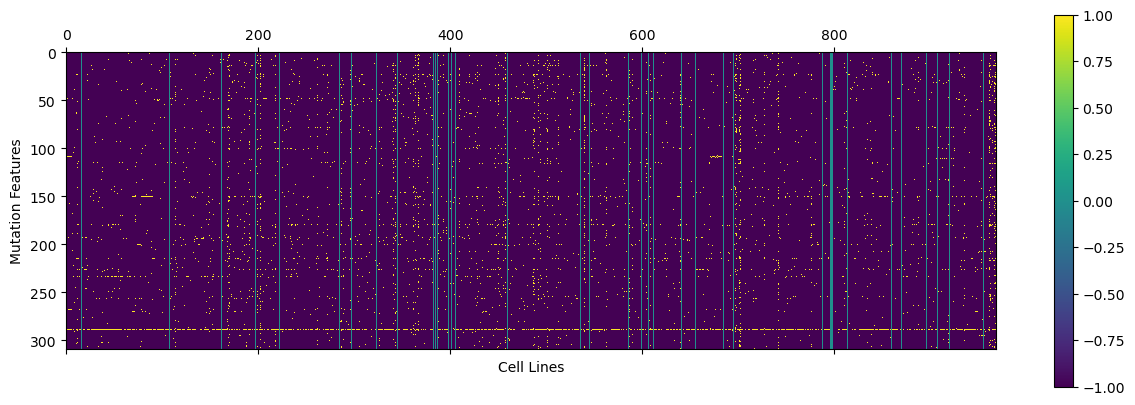

In [166]:
plt.matshow(genetic_feature_matrix[:,:n_mut_features].T)
plt.ylabel("Mutation Features")
plt.xlabel("Cell Lines")
plt.colorbar()
plt.savefig("gdsc2-pancancer-mut-features.png")

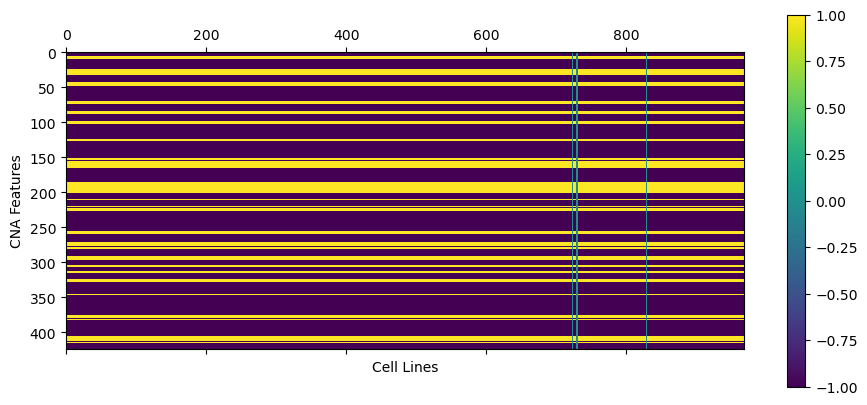

In [165]:
plt.matshow(genetic_feature_matrix[:,n_mut_features:].T)
plt.ylabel("CNA Features")
plt.xlabel("Cell Lines")
plt.colorbar()
plt.savefig("gdsc2-pancancer-cna-features.png")

In [141]:
genetic_data[(genetic_data["COSMIC ID"] == 683667) & (genetic_data["Genetic Feature"] == "ABCB1_mut")]

,Cell Line Name,COSMIC ID,GDSC Desc1,GDSC Desc2,TCGA Desc,Genetic Feature,IS Mutated,Recurrent Gain Loss,Genes in Segment
626690,PFSK-1,683667,nervous_system,medulloblastoma,MB,ABCB1_mut,0,<NA>,<NA>


In [153]:
list(set(genetic_data["IS Mutated"].values))

[0, 1]